<a href="https://colab.research.google.com/github/aashasandeep/Pharmaceutical-Sales-prediction-across-multiple-stores-Project-6/blob/main/Task_1_Pharmaceutical_data_ipynb_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
from scipy import stats
import datetime
import plotly.express as px
from tabulate import tabulate
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
import plotly.graph_objects as go

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [58]:
import logging

In [59]:
logger=logging.getLogger('My_logger')

In [57]:
logger.setLevel(logging.INFO)

In [60]:
##handlers
console_handler=logging.StreamHandler()

In [61]:
file_handler=logging.FileHandler('app.log')

In [62]:
logger.addHandler(console_handler)
logger.addHandler(file_handler)

In [63]:
##formatter
formatter = logging.Formatter('%(asctime)s - %(levelname)s - %(message)s')

In [64]:
console_handler.setFormatter(formatter)
file_handler.setFormatter(formatter)

In [65]:
# Logging levels
logger.debug("This is a debug message")
logger.info("This is an info message")
logger.warning("This is a warning message")
logger.error("This is an error message")


2024-11-02 19:47:58,367 - INFO - This is an info message
INFO:My_logger:This is an info message
2024-11-02 19:47:58,381 - WARNING - This is a warning message
2024-11-02 19:47:58,390 - ERROR - This is an error message
ERROR:My_logger:This is an error message


In [66]:
import os

In [67]:
import logging

# Step 1: Configure logging
logging.basicConfig(
    filename='app.log',  # You can specify a log file
    level=logging.DEBUG,  # Set the log level (DEBUG, INFO, WARNING, ERROR, CRITICAL)
    format='%(asctime)s - %(levelname)s - %(message)s'  # Format of the log messages
)

In [68]:
logger = logging.getLogger('My_logger')

In [69]:
import pandas as pd

In [70]:
# Step 2: Start logging in your project
import logging
import pandas as pd

def load_data(file_path='/content/train.csv'):
    logging.info("Loading data from file: %s", file_path)
    try:
        data = pd.read_csv('/content/train.csv') # Assuming the file is an excel file
        logging.info("Data loaded successfully from %s", file_path)
        return data
    except Exception as e:
        logging.error("Error loading data from file: %s", file_path)
        logging.exception("Exception occurred", exc_info=True)
        return None
        data = pd.read_csv('/content/train.csv')
        logging.info("Data loaded successfully from %s", file_path)
        return data
    except Exception as e:
        logging.error("Error loading data from file: %s", file_path)
        logging.exception("Exception occurred", exc_info=True)
        return None

In [5]:
train_data=pd.read_csv('/content/train (1) (1).csv')

In [6]:
#Viewing five head of train data
train_data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [7]:
#Viewing five tail of train data
train_data.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1


In [8]:
#Viewing shape of train data
train_data.shape

(1017209, 9)

In [9]:
#Viewing information of train data
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [10]:
#Viewing missing value of train data
train_data.isnull().sum()

,0
Store,0
DayOfWeek,0
Date,0
Sales,0
Customers,0
Open,0
Promo,0
StateHoliday,0
SchoolHoliday,0


In [11]:
#describe the train data
train_data.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [12]:
#Veiwing duplicated of the train data
train_data.duplicated().sum()

0

In [13]:
#Viewing columns of train data
train_data.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

In [14]:
numerical = []
categorical = []
timestamps = []

for col in train_data.columns:
    if train_data[col].dtype in ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']:
        numerical.append(col)
    elif train_data[col].dtype == object:
        categorical.append(col)
    else:
        timestamps.append(col)


features = numerical+categorical+timestamps
train_data = train_data[features]
train_data

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,Date,StateHoliday
0,1,5,5263,555,1,1,1,2015-07-31,0
1,2,5,6064,625,1,1,1,2015-07-31,0
2,3,5,8314,821,1,1,1,2015-07-31,0
3,4,5,13995,1498,1,1,1,2015-07-31,0
4,5,5,4822,559,1,1,1,2015-07-31,0
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,0,0,0,0,1,2013-01-01,a
1017205,1112,2,0,0,0,0,1,2013-01-01,a
1017206,1113,2,0,0,0,0,1,2013-01-01,a
1017207,1114,2,0,0,0,0,1,2013-01-01,a


In [15]:
# change the date col to a timestamp feature
train_data.date = pd.to_datetime(train_data["Date"])

In [17]:
test_data = pd.read_csv('/content/test (1) (1).csv')

In [18]:
#Viewing five head of test data
test_data.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [19]:
#Viewing shape of test data
test_data.shape

(41088, 8)

In [20]:
#Viewinginformation of the test data
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             41088 non-null  int64  
 1   Store          41088 non-null  int64  
 2   DayOfWeek      41088 non-null  int64  
 3   Date           41088 non-null  object 
 4   Open           41077 non-null  float64
 5   Promo          41088 non-null  int64  
 6   StateHoliday   41088 non-null  object 
 7   SchoolHoliday  41088 non-null  int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 2.5+ MB


In [21]:
#Viewing missing value of test data
test_data.isnull().sum()

,0
Id,0
Store,0
DayOfWeek,0
Date,0
Open,11
Promo,0
StateHoliday,0
SchoolHoliday,0


In [22]:
test_data = test_data.fillna({'Open': 0})# fill the missing valuewith the 0

In [23]:
test_data.isnull().sum()

,0
Id,0
Store,0
DayOfWeek,0
Date,0
Open,0
Promo,0
StateHoliday,0
SchoolHoliday,0


In [24]:
#Viewing columns of test data
test_data.columns

Index(['Id', 'Store', 'DayOfWeek', 'Date', 'Open', 'Promo', 'StateHoliday',
       'SchoolHoliday'],
      dtype='object')

In [25]:
#describe the test data
test_data.describe()

,Id,Store,DayOfWeek,Open,Promo,SchoolHoliday
count,41088.000000,41088.000000,41088.000000,41088.000000,41088.000000,41088.000000
mean,20544.500000,555.899533,3.979167,0.854094,0.395833,0.443487
std,11861.228267,320.274496,2.015481,0.353017,0.489035,0.496802
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,10272.750000,279.750000,2.000000,1.000000,0.000000,0.000000
50%,20544.500000,553.500000,4.000000,1.000000,0.000000,0.000000
75%,30816.250000,832.250000,6.000000,1.000000,1.000000,1.000000
max,41088.000000,1115.000000,7.000000,1.000000,1.000000,1.000000


In [26]:
#Viewing duplicated of test data
test_data.duplicated().sum()

0

# looping

In [27]:
numerical = []
categorical = []
timestamps = []

for col in test_data.columns:
    if test_data[col].dtype in ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']:
        numerical.append(col)
    elif test_data[col].dtype == object:
        categorical.append(col)
    else:
        timestamps.append(col)


features = numerical+categorical+timestamps
test_data = test_data[features]
test_data.head(3)

,Id,Store,DayOfWeek,Open,Promo,SchoolHoliday,Date,StateHoliday
0,1,1,4,1.0,1,0,2015-09-17,0
1,2,3,4,1.0,1,0,2015-09-17,0
2,3,7,4,1.0,1,0,2015-09-17,0


In [28]:
# change the date col to a timestamp feature
test_data.date = pd.to_datetime(test_data["Date"])

In [29]:
store_data = pd.read_csv("/content/store (1).csv")

In [30]:
store_data.head()# head of the store dataset

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [31]:
store_data.tail()# tail of the store dataset

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN
1114,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


In [32]:
store_data.shape# shape of the store dataset

(1115, 10)

In [33]:
store_data.info()# infomation of the store dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [34]:
store_data.isnull().sum()# finding the missing value of the dataset

,0
Store,0
StoreType,0
Assortment,0
CompetitionDistance,3
CompetitionOpenSinceMonth,354
CompetitionOpenSinceYear,354
Promo2,0
Promo2SinceWeek,544
Promo2SinceYear,544
PromoInterval,544


In [54]:
store_data.count(0)/store_data.shape[0] * 100

,0
Store,100.0
CompetitionDistance,100.0
CompetitionOpenSinceMonth,100.0
CompetitionOpenSinceYear,100.0
Promo2,100.0
Promo2SinceWeek,100.0
Promo2SinceYear,100.0
StoreType,100.0
Assortment,100.0
PromoInterval,100.0


In [35]:
store_data.describe()# describe the dataset

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


In [36]:
store_data.duplicated().sum()# checking the duplicate entry in the dataset

0

In [37]:
store_data.columns# columns of the store dataset

Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [38]:
#  Filling numerical missing values with 'median'
numerical_cols = store_data.select_dtypes(include=['float64', 'int64']).columns
store_data[numerical_cols] = store_data[numerical_cols].apply(lambda x: x.fillna(x.median()), axis=0)

In [39]:
# Filling categorical missing values with 'mode'
categorical_cols = store_data.select_dtypes(include=['object']).columns
store_data[categorical_cols] = store_data[categorical_cols].apply(lambda x: x.fillna(x.mode()),axis=0)

In [40]:
# Filling categorical missing values with 'Unknown'
categorical_cols = store_data.select_dtypes(include=['object']).columns
store_data[categorical_cols] = store_data[categorical_cols].apply(lambda x: x.fillna('Unknown'))

In [41]:
store_data.isnull().sum()

,0
Store,0
StoreType,0
Assortment,0
CompetitionDistance,0
CompetitionOpenSinceMonth,0
CompetitionOpenSinceYear,0
Promo2,0
Promo2SinceWeek,0
Promo2SinceYear,0
PromoInterval,0


# looping

In [42]:
numerical = []
categorical = []
timestamps = []

for col in store_data.columns:
    if store_data[col].dtype in ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']:
        numerical.append(col)
    elif store_data[col].dtype == object:
        categorical.append(col)
    else:
        timestamps.append(col)


features = numerical+categorical+timestamps
store_data = store_data[features]
store_data.head(3)

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,StoreType,Assortment,PromoInterval
0,1,1270.0,9.0,2008.0,0,22.0,2012.0,c,a,"Jan,Apr,Jul,Oct"
1,2,570.0,11.0,2007.0,1,13.0,2010.0,a,a,"Jan,Apr,Jul,Oct"
2,3,14130.0,12.0,2006.0,1,14.0,2011.0,a,a,"Jan,Apr,Jul,Oct"


In [43]:
#Knowing the shapes of our datasets
print(f'Training dataset:{train_data.shape}')
print(f'Testing dataset:{test_data.shape}')
print(f'Store dataset:{store_data.shape}')

Training dataset:(1017209, 9)
Testing dataset:(41088, 8)
Store dataset:(1115, 10)


In [44]:
## Dealing with cardinality
train_data['StateHoliday'].replace({0:'o','0':'o'},inplace=True)
test_data['StateHoliday'].replace({'0':'o'},inplace=True)

In [46]:
sample_submisssion = pd.read_csv("/content/sample_submission.csv")

In [47]:
sample_submisssion.head()# head of the dataset

,Id,Sales
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [48]:
sample_submisssion.tail()# tail of the dataset

,Id,Sales
41083,41084,0
41084,41085,0
41085,41086,0
41086,41087,0
41087,41088,0


In [50]:
sample_submisssion.duplicated().sum()# duplicate of the dataset

0

In [51]:
sample_submisssion.isnull().sum()# missing value of the dataset

,0
Id,0
Sales,0


#Merging the datset

In [52]:
#Merging the training dataset with the store dataset
train_store_data=pd.merge(train_data, store_data, on='Store', how='inner')

In [53]:
train_store_data

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,Date,StateHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,StoreType,Assortment,PromoInterval
0,1,5,5263,555,1,1,1,2015-07-31,o,1270.0,9.0,2008.0,0,22.0,2012.0,c,a,"Jan,Apr,Jul,Oct"
1,2,5,6064,625,1,1,1,2015-07-31,o,570.0,11.0,2007.0,1,13.0,2010.0,a,a,"Jan,Apr,Jul,Oct"
2,3,5,8314,821,1,1,1,2015-07-31,o,14130.0,12.0,2006.0,1,14.0,2011.0,a,a,"Jan,Apr,Jul,Oct"
3,4,5,13995,1498,1,1,1,2015-07-31,o,620.0,9.0,2009.0,0,22.0,2012.0,c,c,Unknown
4,5,5,4822,559,1,1,1,2015-07-31,o,29910.0,4.0,2015.0,0,22.0,2012.0,a,a,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,0,0,0,0,1,2013-01-01,a,1900.0,6.0,2014.0,1,31.0,2013.0,a,a,"Jan,Apr,Jul,Oct"
1017205,1112,2,0,0,0,0,1,2013-01-01,a,1880.0,4.0,2006.0,0,22.0,2012.0,c,c,Unknown
1017206,1113,2,0,0,0,0,1,2013-01-01,a,9260.0,8.0,2010.0,0,22.0,2012.0,a,c,Unknown
1017207,1114,2,0,0,0,0,1,2013-01-01,a,870.0,8.0,2010.0,0,22.0,2012.0,a,c,Unknown


In [71]:
#Function for etecting outliers in our numerical variables data using boxplots
def plot_outliers(dataFrame, vars_names):
    fig, ax = plt.subplots(len(vars_names), figsize = (7, 20))

    for i, var in enumerate(vars_names):
        sns.boxplot(y = dataFrame[var], ax = ax[i])
        ax[i].set_title('Box plot - {}'.format(var), fontsize = 10)
        ax[i].set_xlabel(var, fontsize = 8)

    plt.show()


  # a function for replacing outliers with the median, used when there's too many outliers in a feature
def replace_outlier_with_median(dataFrame, feature):
    Q1 = dataFrame[feature].quantile(0.25)
    Q3 = dataFrame[feature].quantile(0.75)
    median = dataFrame[feature].quantile(0.50)

    IQR = Q3 - Q1

    upper_whisker = Q3 + (1.5 * IQR)
    lower_whisker = Q1 - (1.5 * IQR)

    dataFrame[feature] = np.where(dataFrame[feature] > upper_whisker, median, dataFrame[feature])
    dataFrame[feature] = np.where(dataFrame[feature] < lower_whisker, median, dataFrame[feature])

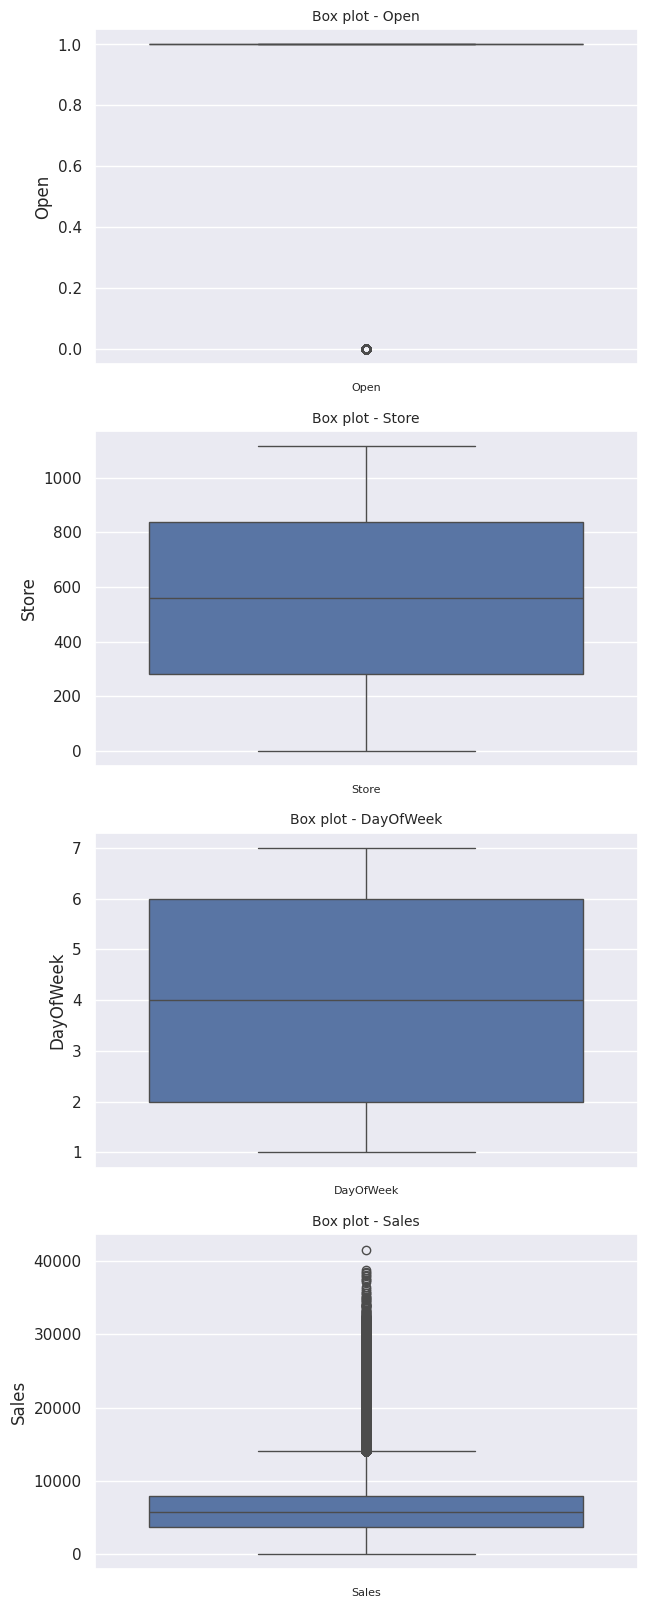

In [72]:
plot_outliers(train_data, ['Open', 'Store','DayOfWeek','Sales'])

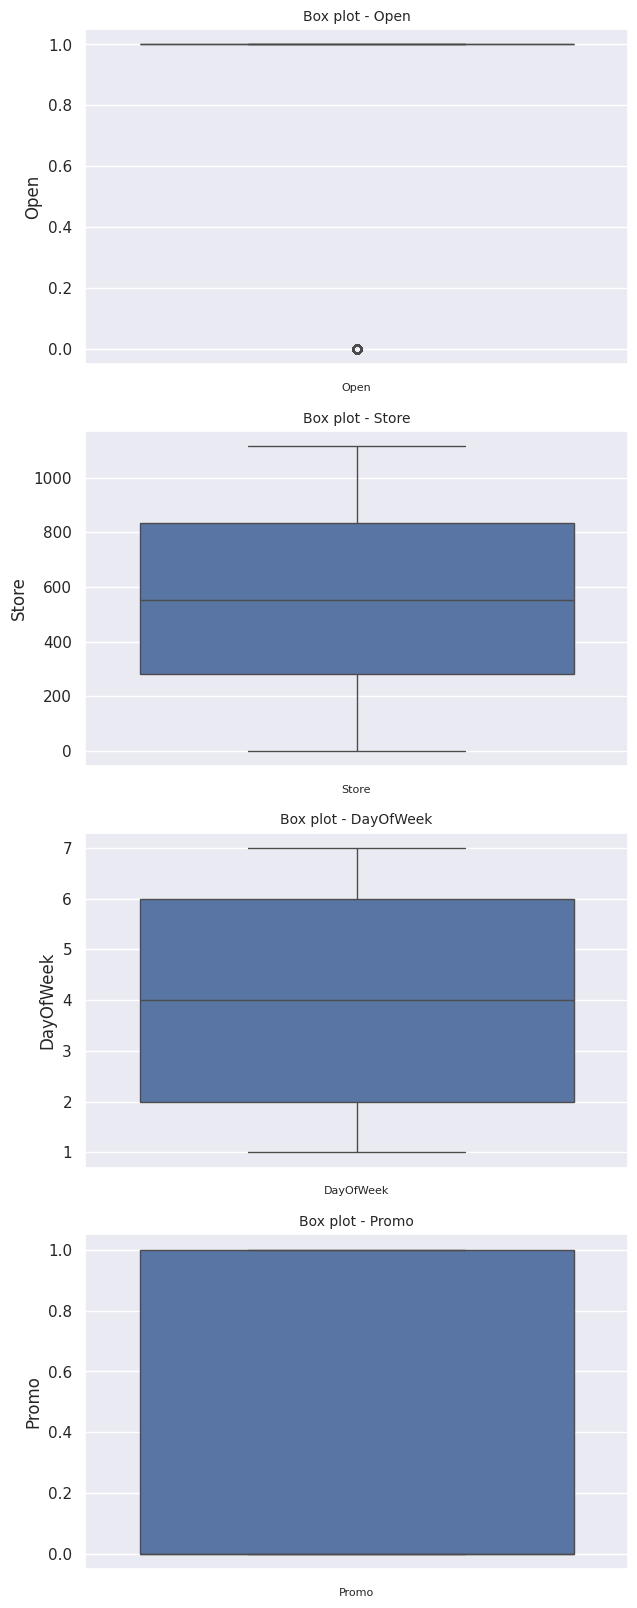

In [73]:
plot_outliers(test_data, ['Open', 'Store','DayOfWeek','Promo'])

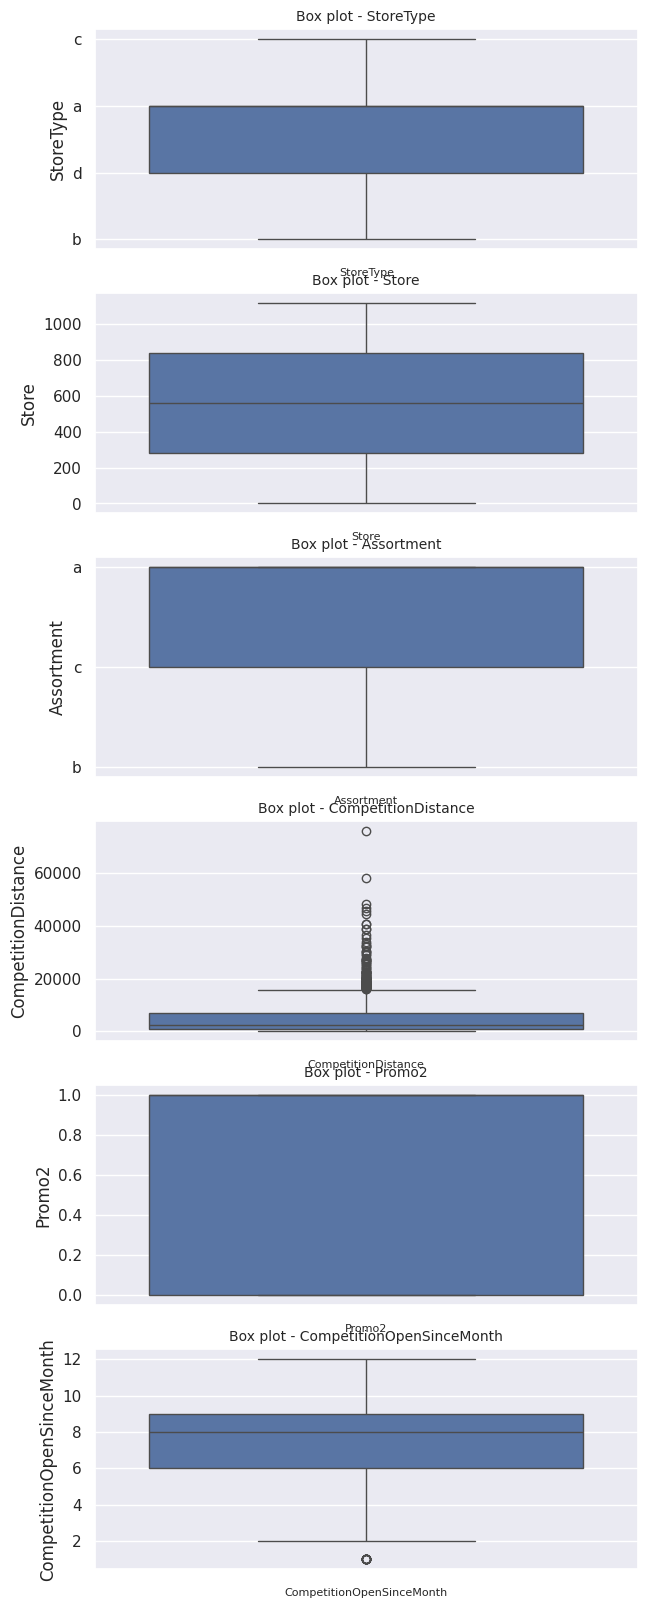

In [74]:
plot_outliers(store_data, ['StoreType', 'Store','Assortment','CompetitionDistance','Promo2','CompetitionOpenSinceMonth'])

In [75]:
train_data.Sales.describe()

,Sales
count,1.017209e+06
mean,5.773819e+03
std,3.849926e+03
min,0.000000e+00
25%,3.727000e+03
50%,5.744000e+03
75%,7.856000e+03
max,4.155100e+04


In [76]:
train_data=train_data.drop(train_data[(train_data.Open == 1) & (train_data.Sales == 0)].index)
train_data = train_data.reset_index(drop=True)

<Axes: xlabel='Sales', ylabel='Density'>

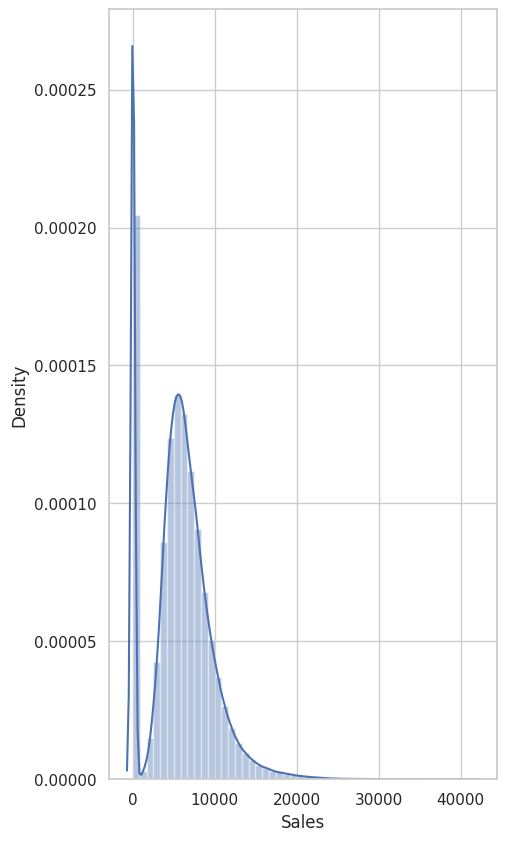

In [77]:
#Find the range of data
plt.figure(figsize=(5,10))
sns.set(style="whitegrid")
sns.distplot(train_data["Sales"])

<Axes: xlabel='DayOfWeek', ylabel='Sales'>

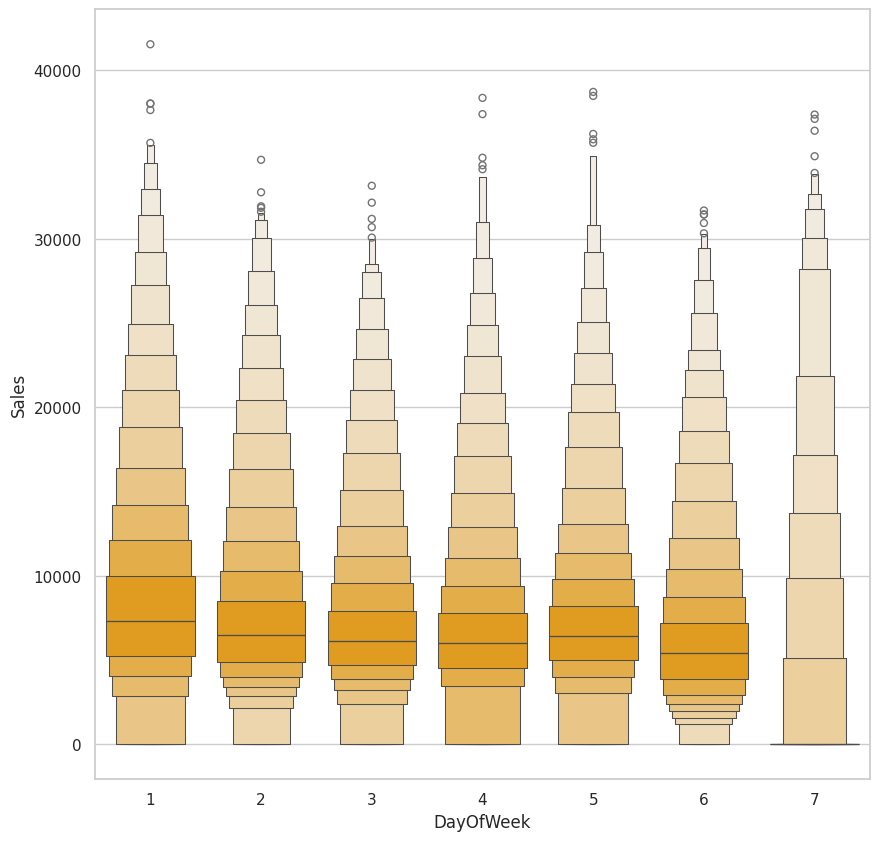

In [78]:
plt.figure(figsize=(10,10))
sns.set(style="whitegrid")
sns.boxenplot(data=train_data,scale="linear",x="DayOfWeek",y="Sales",color="orange")

In [79]:
train_data.Customers.describe()

,Customers
count,1.017155e+06
mean,6.331796e+02
std,4.644012e+02
min,0.000000e+00
25%,4.050000e+02
50%,6.090000e+02
75%,8.370000e+02
max,7.388000e+03


# 1) CompetitionDistance:
fill it with either the mean or the median of this variable.

In [81]:
stats.pearsonr(train_data.Customers, train_data.Sales)[0]

0.8946997899355651

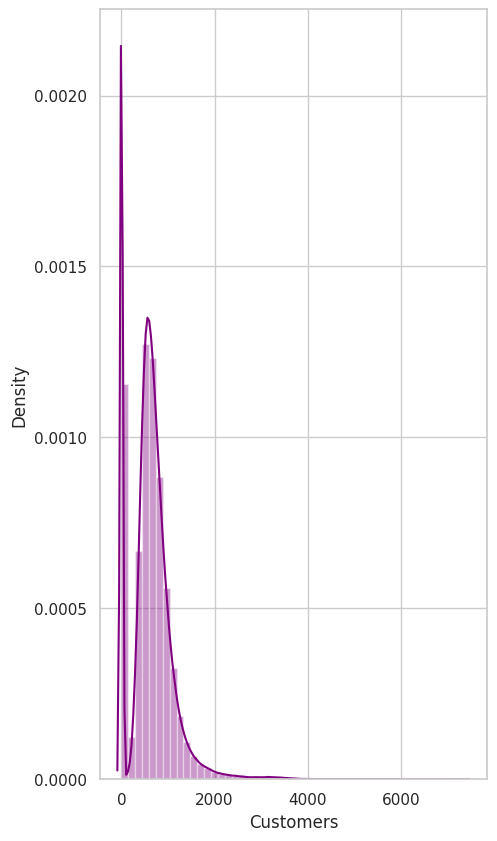

In [83]:
# Find the range of the data in the distribution plot
plt.figure(figsize=(5,10))
sns.set(style="whitegrid")

# Adding color to the distplot
sns.distplot(train_data["Customers"], color='purple')

# Show the plot
plt.show()

<Axes: xlabel='DayOfWeek', ylabel='Customers'>

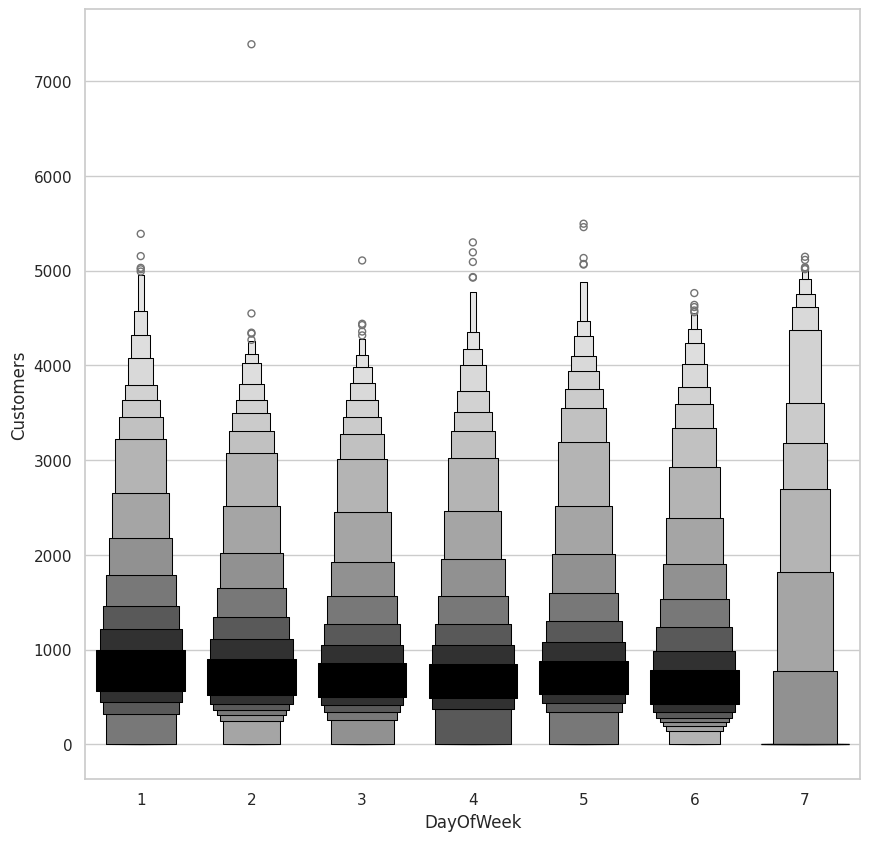

In [84]:
plt.figure(figsize=(10,10))
sns.set(style="whitegrid")
sns.boxenplot(y="Customers", x="DayOfWeek",data=train_data, scale="linear",color="black")

In [85]:
replace_outlier_with_median(train_data, 'Sales')

In [86]:
replace_outlier_with_median(train_data, 'Customers')

<Axes: xlabel='Sales', ylabel='Density'>

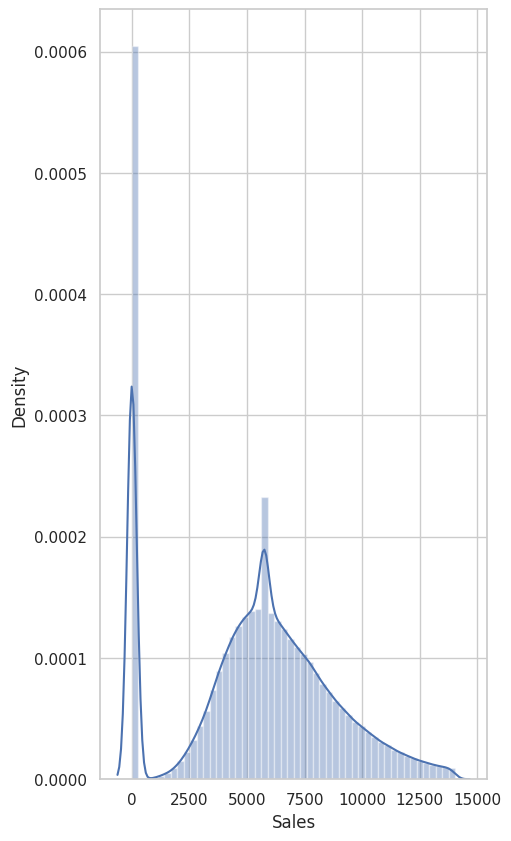

In [87]:
#Find the range of data
plt.figure(figsize=(5,10))
sns.set(style="whitegrid")
sns.distplot(train_data["Sales"])

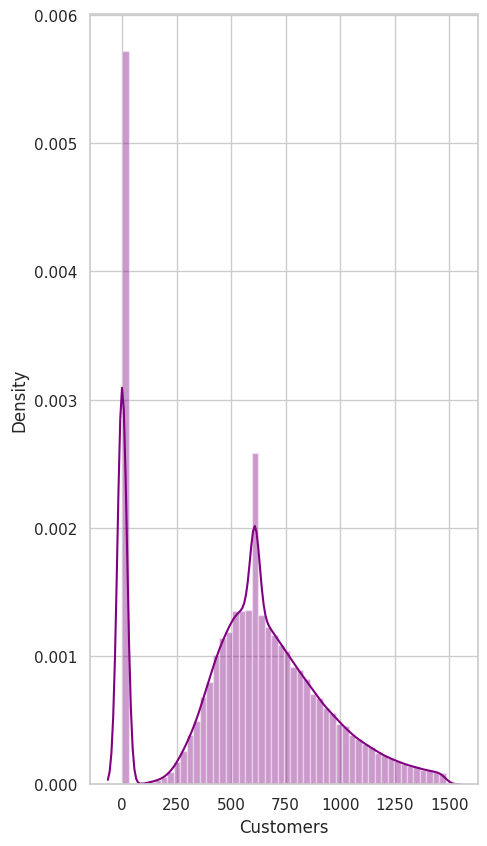

In [88]:
# Find the range of the data in the distribution plot
plt.figure(figsize=(5,10))
sns.set(style="whitegrid")

# Adding color to the distplot
sns.distplot(train_data["Customers"], color='purple')

# Show the plot
plt.show()

In [89]:
store_data['CompetitionDistance'].fillna(store_data['CompetitionDistance'].median(), inplace = True)

#2) CompetitionOpenSinceMonth and CompetitionOpenSinceYear?**

In [90]:
store_data.CompetitionOpenSinceMonth.fillna(0, inplace = True)
store_data.CompetitionOpenSinceYear.fillna(0,inplace=True)

#3) Promo2SinceWeek, Promo2SinceYear and PromoInterval ?

In [91]:
store_data.Promo2SinceWeek.fillna(0,inplace=True)
store_data.Promo2SinceYear.fillna(0,inplace=True)
store_data.PromoInterval.fillna(0,inplace=True)

# Merging the datset

In [92]:
#Merging the training dataset with the store dataset
train_store_data=pd.merge(train_data, store_data, on='Store', how='inner')

In [93]:
train_store_data

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,Date,StateHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,StoreType,Assortment,PromoInterval
0,1,5,5263.0,555.0,1,1,1,2015-07-31,o,1270.0,9.0,2008.0,0,22.0,2012.0,c,a,"Jan,Apr,Jul,Oct"
1,2,5,6064.0,625.0,1,1,1,2015-07-31,o,570.0,11.0,2007.0,1,13.0,2010.0,a,a,"Jan,Apr,Jul,Oct"
2,3,5,8314.0,821.0,1,1,1,2015-07-31,o,14130.0,12.0,2006.0,1,14.0,2011.0,a,a,"Jan,Apr,Jul,Oct"
3,4,5,13995.0,609.0,1,1,1,2015-07-31,o,620.0,9.0,2009.0,0,22.0,2012.0,c,c,Unknown
4,5,5,4822.0,559.0,1,1,1,2015-07-31,o,29910.0,4.0,2015.0,0,22.0,2012.0,a,a,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017150,1111,2,0.0,0.0,0,0,1,2013-01-01,a,1900.0,6.0,2014.0,1,31.0,2013.0,a,a,"Jan,Apr,Jul,Oct"
1017151,1112,2,0.0,0.0,0,0,1,2013-01-01,a,1880.0,4.0,2006.0,0,22.0,2012.0,c,c,Unknown
1017152,1113,2,0.0,0.0,0,0,1,2013-01-01,a,9260.0,8.0,2010.0,0,22.0,2012.0,a,c,Unknown
1017153,1114,2,0.0,0.0,0,0,1,2013-01-01,a,870.0,8.0,2010.0,0,22.0,2012.0,a,c,Unknown


In [94]:
train_store_data.to_csv('train_store_data.csv', index=False)